In [1]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric
!pip install torch==1.9.0

     |████████████████████████████████| 8.0 MB 35.8 MB/s 
     |████████████████████████████████| 48 kB 2.5 MB/s 
     |████████████████████████████████| 407 kB 34.9 MB/s 
     |████████████████████████████████| 831.4 MB 2.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.9.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(737, 738, 3)


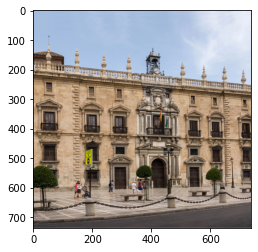

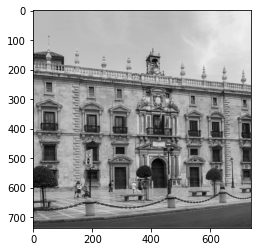

SLIC number of segments: 195


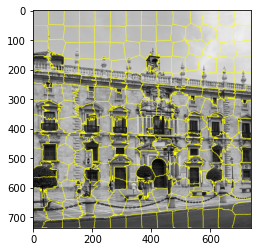

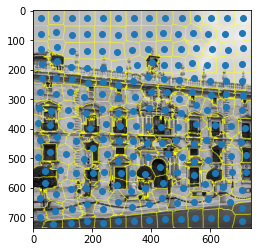

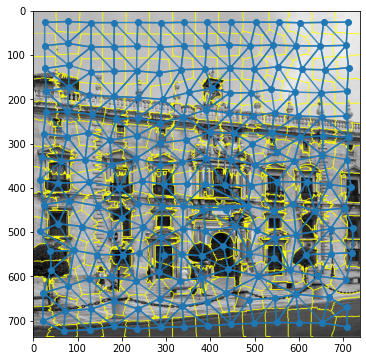

In [ ]:
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut
from skimage.util import img_as_float
from skimage.color import gray2rgb, rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


img = np.array(Image.open('drive/MyDrive/graph_classification-main-2---/MonuMAI_train/Baroque/5b8a5bebf2b05.jpg'))
img = (img / float(img.max())).astype(np.float32)
print(img.shape)
plt.imshow(img)
plt.show()

img = rgb2gray(img) 
img = gray2rgb(img)
plt.imshow(img)
plt.show()

segments = slic(img, n_segments=200, slic_zero=True, start_label=0)

print(f"SLIC number of segments: {len(np.unique(segments))}")

plt.imshow(mark_boundaries(img, segments))
plt.show()

import matplotlib.lines as lines


# centers
segments_ids = np.unique(segments)
centers = np.array([np.mean(np.nonzero(segments==i), axis=1) for i in segments_ids])

plt.imshow(mark_boundaries(img, segments))
plt.scatter(centers[:,1],centers[:,0])


vs_right = np.vstack([segments[:,:-1].ravel(), segments[:,1:].ravel()])
vs_below = np.vstack([segments[:-1,:].ravel(), segments[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
plt.imshow(mark_boundaries(img, segments))
plt.scatter(centers[:,1], centers[:,0])

for i in range(bneighbors.shape[1]):
    y0, x0 = centers[bneighbors[0,i]]
    y1, x1 = centers[bneighbors[1,i]]

    l = lines.Line2D([x0,x1], [y0,y1], alpha=0.8)
    ax.add_line(l)

In [3]:
from torchvision.datasets import CIFAR10
print("Reading dataset")
dataset = CIFAR10("../data/", download=True)

Reading dataset


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data/


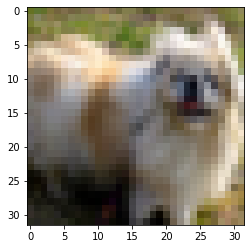

In [12]:
import numpy as np

img = dataset[1][0]
import matplotlib.pyplot as plt
plt.imshow(img)

img = dataset[4][0]
import matplotlib.pyplot as plt
plt.imshow(img)

img = dataset[6][0]
import matplotlib.pyplot as plt
plt.imshow(img)

img = dataset[7][0]
import matplotlib.pyplot as plt
plt.imshow(img)

img = dataset[40][0]
import matplotlib.pyplot as plt
plt.imshow(img)

(320, 320, 3)


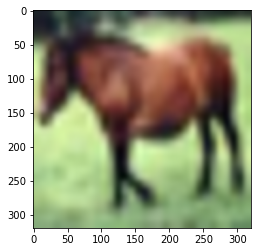

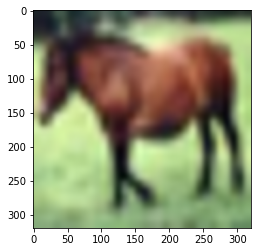

SLIC number of segments: 196


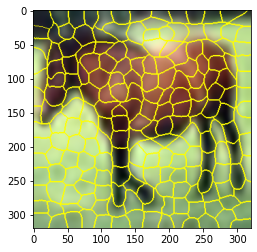

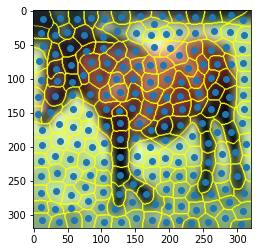

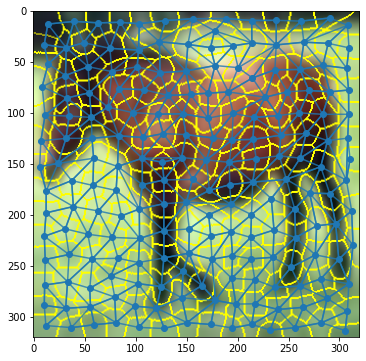

In [104]:
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut
from skimage.util import img_as_float
from skimage.color import gray2rgb, rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = dataset[7][0] #
img = img.resize((320,320))
img = np.array(img)
img = img.reshape((320, 320,3)) / 255
print(img.shape)
plt.imshow(img)
plt.show()


plt.imshow(img)
plt.show()

segments = slic(img, n_segments=200, slic_zero=True, start_label=0)

print(f"SLIC number of segments: {len(np.unique(segments))}")

plt.imshow(mark_boundaries(img, segments))
plt.show()

import matplotlib.lines as lines


# centers
segments_ids = np.unique(segments)
centers = np.array([np.mean(np.nonzero(segments==i), axis=1) for i in segments_ids])

plt.imshow(mark_boundaries(img, segments))
plt.scatter(centers[:,1],centers[:,0])


vs_right = np.vstack([segments[:,:-1].ravel(), segments[:,1:].ravel()])
vs_below = np.vstack([segments[:-1,:].ravel(), segments[1:,:].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
plt.imshow(mark_boundaries(img, segments))
plt.scatter(centers[:,1], centers[:,0])

for i in range(bneighbors.shape[1]):
    y0, x0 = centers[bneighbors[0,i]]
    y1, x1 = centers[bneighbors[1,i]]

    l = lines.Line2D([x0,x1], [y0,y1], alpha=0.8)
    ax.add_line(l)